<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/StockCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if not already installed)
!pip install Riskfolio-Lib
!pip install yfinance
!pip install pyfolio
!pip install zipline-reloaded

In [ ]:
# Install required libraries (if not already installed)

# Import libraries
import riskfolio as rp
import pandas as pd
import yfinance as yf
import seaborn as sns
import pyfolio as pf

# Define the list of assets
assets = [
    "PANW",  # Palo Alto Networks, Inc. - Cybersecurity/Technology sector; provides exposure to the growing cybersecurity industry, high growth potential but volatile.
    "NVDA",  # NVIDIA Corporation - Technology/Semiconductors; leader in GPUs for AI, gaming, and data centers, high growth (AI boom) but cyclical volatility.
    "AAPL",  # Apple Inc. - Technology/Consumer Electronics; blue-chip tech stock, known for iPhones, Macs, and services, offers stability and growth.
    "MSFT",  # Microsoft Corporation - Technology/Software; blue-chip tech stock with strong cloud computing (Azure) presence, balances growth and stability.
    "GOOG",  # Alphabet Inc. (Class C Shares) - Technology/Internet Services; parent of Google, dominant in search/advertising, growth in cloud and innovation.
    "TSLA",  # Tesla, Inc. - Consumer Discretionary/Electric Vehicles; leading EV manufacturer, also in energy storage, high growth but volatile due to market sentiment.
    "DIS",   # The Walt Disney Company - Communication Services/Entertainment; media giant with theme parks, streaming (Disney+), and film studios, offers diversified exposure.
    "AXP",   # American Express Company - Financial Services/Credit Services; global payments company, known for credit cards, offers stability and exposure to consumer spending.
    "GLD",   # SPDR Gold Shares - Commodities/ETF; tracks the price of gold, used as a hedge against inflation and market uncertainty, adds diversification.
    "^GSPC", # S&P 500 Index - Market Index; broad market benchmark, used to compare portfolio performance against the overall U.S. equity market.
]

# Collect and format data with error handling
try:
    data = yf.download(
        assets,
        start="2024-01-01",
        end="2025-08-08",
        auto_adjust=False  # Explicitly set to False to avoid the warning
    )
    # Check if the download was successful for all tickers
    if data.empty or data.isna().all().all():
        raise ValueError("No data was downloaded. Please check the tickers or your internet connection.")

    # Select the Adjusted Close prices and rename columns if needed
    data = data.loc[:, "Adj Close"]
    # Ensure column names match the tickers (sometimes yfinance changes order)
    data.columns = [col if col in assets else assets[i] for i, col in enumerate(data.columns)]

    # Check for missing data
    if data.isna().any().any():
        print("Warning: Missing data detected. Filling with forward fill method.")
        data = data.fillna(method="ffill")

except Exception as e:
    print(f"Error downloading data: {e}")

# Display the first few rows of the data to verify
print(data.head())

[*********************100%***********************]  10 of 10 completed


                  AAPL         AXP        DIS         GLD        GOOG  \
Date                                                                    
2024-01-02  184.532089  185.031143  89.895103  190.720001  138.902084   
2024-01-03  183.150391  183.075790  90.826660  189.130005  139.698334   
2024-01-04  180.824371  184.475571  89.746445  189.320007  137.389252   
2024-01-05  180.098694  186.368240  90.083397  189.350006  136.742325   
2024-01-08  184.452545  186.516113  90.727554  187.869995  139.867508   

                  MSFT       NVDA        PANW        TSLA        ^GSPC  
Date                                                                    
2024-01-02  367.380615  48.149918  144.460007  248.419998  4742.830078  
2024-01-03  367.113159  47.551144  143.235001  238.449997  4704.810059  
2024-01-04  364.478149  47.979984  141.649994  237.929993  4688.680176  
2024-01-05  364.289978  49.078568  141.464996  237.490005  4697.240234  
2024-01-08  371.164703  52.233379  144.750000  240

In [ ]:
data.tail()

,AAPL,AXP,DIS,GLD,GOOG,MSFT,NVDA,PANW,TSLA,^GSPC
Date,,,,,,,,,,
2025-04-03,203.190002,247.000015,88.839996,286.420013,152.630005,373.109985,101.800003,165.169998,267.279999,5396.520020
2025-04-04,188.380005,233.679993,83.529999,279.720001,147.740005,359.839996,94.309998,153.570007,239.429993,5074.080078
2025-04-07,181.460007,234.279999,83.300003,273.709991,149.240005,357.859985,97.639999,152.440002,233.289993,5062.250000
2025-04-08,172.419998,231.389999,81.720001,275.200012,146.580002,354.559998,96.300003,152.529999,221.860001,4982.770020
2025-04-09,196.779999,262.901398,90.930000,285.600006,159.865005,388.679993,113.990997,172.464996,269.096802,5433.779785


In [ ]:
# Returns
returns = data.pct_change().dropna()
returns.median().sort_values(ascending=False).to_frame(name="median_return")

,median_return
NVDA,0.003612
GOOG,0.003177
PANW,0.002898
GLD,0.001822
AAPL,0.001384
^GSPC,0.000943
AXP,0.000750
MSFT,0.000676
DIS,0.000391
TSLA,-0.001179


<Axes: >

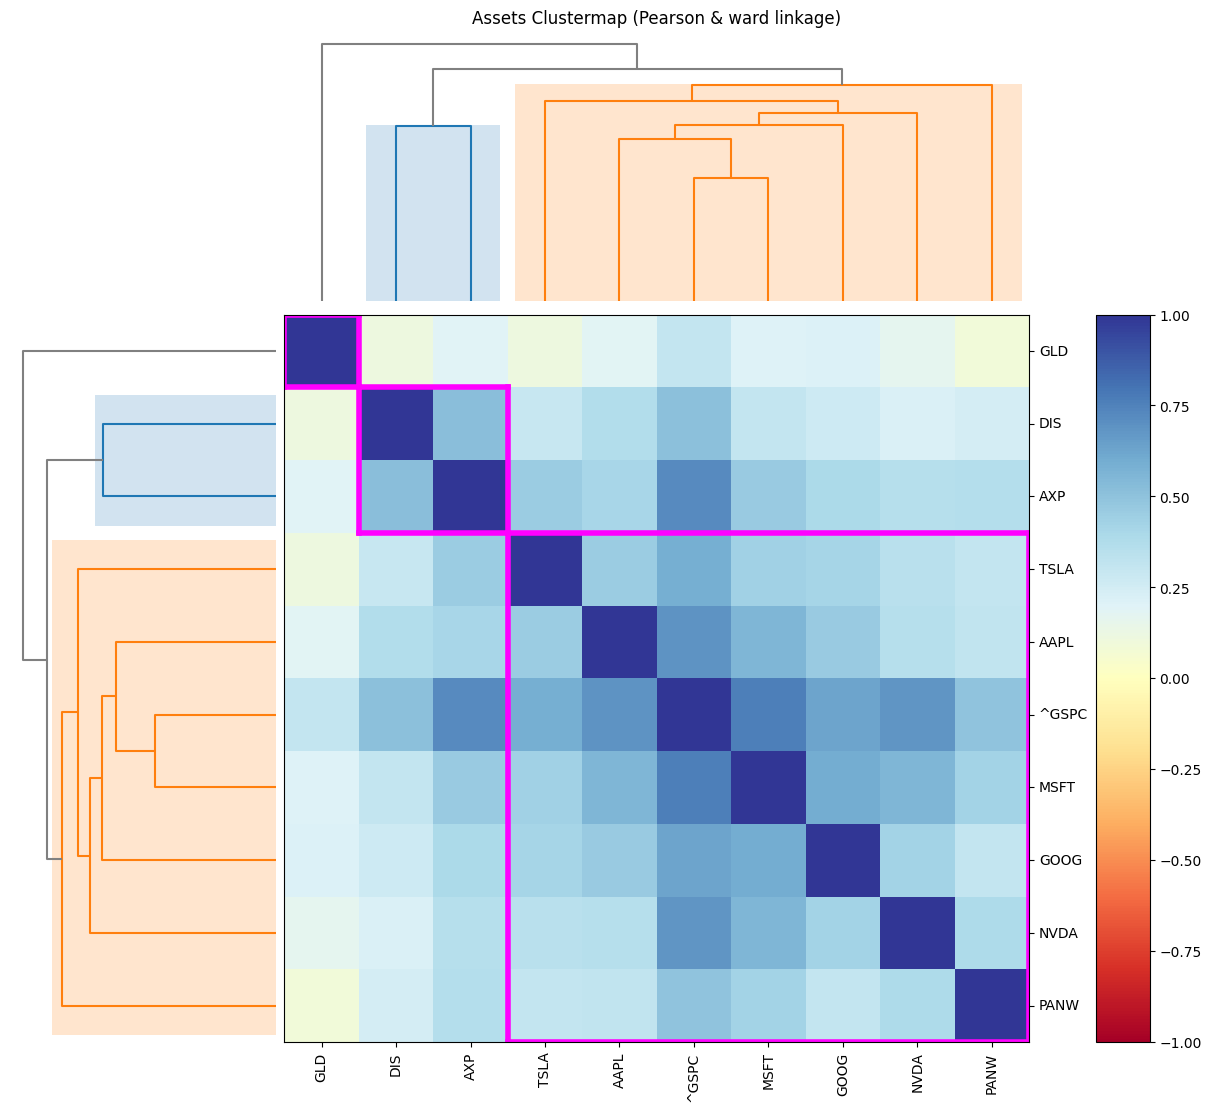

In [ ]:
# Clustering Correlation
rp.plot_clusters(
    returns=returns,
    codependence='pearson',
    linkage='ward',
    k=None,
    max_k=10,
    leaf_order=True,
    dendrogram=True,
    ax=None
)